### Librerías

In [1]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
from scipy import stats

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

# Conexión SQL
# ==============================================================================
import psycopg2 as ps

import seaborn as sns

#Biblioteca para estimar modelos estadísticos y realizar pruebas estadísticas.
# ==============================================================================
import statsmodels.formula.api as sfm 

from sklearn.preprocessing import PolynomialFeatures 

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression 
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

from sklearn import linear_model

### Conexión SQL

In [2]:
conexion = ps.connect(host="codbview.c21jlbp5d5qr.us-east-1.rds.amazonaws.com", database="codb", user="sgonzalez", password="AdarlaToda100%",port="5432")

In [25]:
# Creamos el cursor con el objeto conexion
cur = conexion.cursor()

# Ejecutamos una consulta
sql = """
select ipc, activations, radio, tv, ooh, pop, digital_performance, rotacion, comisiones, 
eventos_alto_bitacora, eventos_bajo_bitacora, eventos_medio_bitacora 
from sal_indicators_in sa 
where sales_channel = 'Own Stores'
"""

consulta = cur.execute(sql)

data = cur.fetchall()

In [26]:
df = pd.DataFrame(data,columns=['ipc','activations','radio','tv','ooh','pop','digital_performance','rotacion','comisiones','eventos_alto_bitacora','eventos_bajo_bitacora','eventos_medio_bitacora'])

df['ipc']=df['ipc'].astype('float')
df['rotacion']=df['rotacion'].astype('float')
df['eventos_alto_bitacora']=df['eventos_alto_bitacora'].astype('float')
df['eventos_bajo_bitacora']=df['eventos_bajo_bitacora'].astype('float')
df['eventos_medio_bitacora']=df['eventos_medio_bitacora'].astype('float')


df = df.fillna(0)
#df = df.dropna()

df.head()

,ipc,activations,radio,tv,ooh,pop,digital_performance,rotacion,comisiones,eventos_alto_bitacora,eventos_bajo_bitacora,eventos_medio_bitacora
0,1.60,2732,41687525,771166,0,2884220.0,365633245,0.10,857916,0.00,0.0,1.00
1,1.56,2247,57231920,95440163,79373000,8170000.0,422084086,0.04,1114376,0.75,0.0,0.25
2,1.51,1959,116243171,194643334,0,0.0,429255030,0.09,2616521,1.00,0.0,0.00
3,1.95,1259,117469351,366792554,0,34349575.0,426026002,0.00,2700602,0.30,0.1,0.60
4,3.30,632,131734088,320208915,0,34349575.0,372675824,0.15,2699055,1.00,0.0,0.00


### Distribución de los Datos

<Figure size 2160x1440 with 0 Axes>

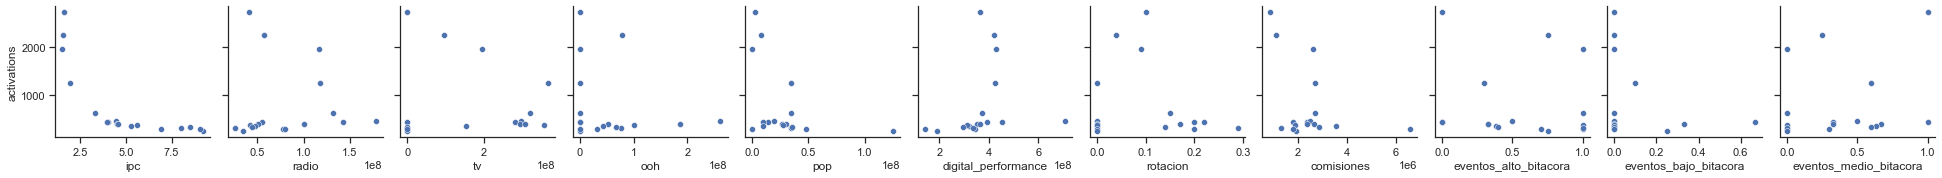

In [27]:
plt.figure(figsize=(30,20)) 
sns.set_theme(style="ticks")

sns.pairplot(df, x_vars=['ipc','radio','tv','ooh','pop','digital_performance','rotacion','comisiones','eventos_alto_bitacora','eventos_bajo_bitacora','eventos_medio_bitacora'], y_vars=['activations']) 

plt.show()

### Correlaciones

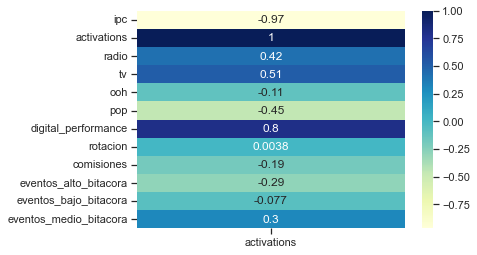

In [28]:
corrMatrix_1 = df.corr(method ='spearman')[['activations']]


sns.heatmap(corrMatrix_1, annot=True,cmap="YlGnBu")

plt.show()

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled = scaler.fit_transform(df)

df = pd.DataFrame(scaled,columns=['ipc','activations','radio','tv','ooh','pop','digital_performance','rotacion','comisiones','eventos_alto_bitacora','eventos_bajo_bitacora','eventos_medio_bitacora'])

df = df.fillna(0)
#df = df.dropna()

df.head()

,ipc,activations,radio,tv,ooh,pop,digital_performance,rotacion,comisiones,eventos_alto_bitacora,eventos_bajo_bitacora,eventos_medio_bitacora
0,-1.311166,2.581108,-0.870890,-1.066161,-0.736316,-0.857172,-0.004035,0.062084,-1.293326,-1.531394,-0.452709,1.889798
1,-1.326841,1.943067,-0.508717,-0.418478,0.365472,-0.669777,0.480201,-0.571175,-1.085222,0.536961,-0.452709,-0.343281
2,-1.346435,1.564189,0.866201,0.260227,-0.736316,-0.959425,0.541714,-0.043459,0.133693,1.226413,-0.452709,-1.087641
3,-1.174010,0.643304,0.894770,1.437996,-0.736316,0.258356,0.514015,-0.993348,0.201920,-0.704052,0.117369,0.698822
4,-0.644979,-0.181546,1.227128,1.119291,-0.736316,0.258356,0.056376,0.589801,0.200665,1.226413,-0.452709,-1.087641


### Omitir Variables 
De acuerdo a su correlación

In [30]:
#del df['eventos_medio_bitacora']
del df['radio']
#del df['ipc']
#del df['eventos_alto_bitacora']
#del df['ooh']
#del df['pop']
#del df['tv']
#del df['rotacion']
#del df['comisiones']
#del df['digital_performance']
#del df['eventos_bajo_bitacora']

### Regresión Lineal

In [31]:
# División de los datos en train y test
# ==============================================================================
X = df.drop(columns='activations',axis=1)
y = df['activations']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

#Prediction using test set 
y_pred = lin_reg.predict(X_test)
mae=metrics.mean_absolute_error(y_test, y_pred)
mse=metrics.mean_squared_error(y_test, y_pred)

# Printing the metrics
print('R2 square:',metrics.r2_score(y_test, y_pred))
print('MAE: ', mae)
print('MSE: ', mse)
print('')

print('explained_variance:',metrics.explained_variance_score(y_test, y_pred))
print('')

print('')
model=sm.OLS(y,X).fit() 

model.summary()

R2 square: 0.9451998104430692
MAE:  0.30937688391061774
MSE:  0.10237513056953666

explained_variance: 0.9636011136229561




<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            activations   R-squared (uncentered):                   0.992
Model:                            OLS   Adj. R-squared (uncentered):              0.981
Method:                 Least Squares   F-statistic:                              90.01
Date:                Thu, 14 Jul 2022   Prob (F-statistic):                    1.98e-06
Time:                        13:42:29   Log-Likelihood:                          17.225
No. Observations:                  17   AIC:                                     -14.45
Df Residuals:                       7   BIC:                                     -6.119
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
ipc                       -0.7784      0.095     -8.165      0.000      -1.004      -0.553
tv                        -0.6080      0.044    -13.763      0.000      -0.712      -0.504
ooh                       -0.2828      0.081     -3.511      0.010      -0.473      -0.092
pop                       -0.0722      0.058     -1.255      0.250      -0.208       0.064
digital_performance        0.0894      0.080      1.120      0.300      -0.099       0.278
rotacion                  -0.4023      0.066     -6.069      0.001      -0.559      -0.246
comisiones                -0.3651      0.046     -7.899      0.000      -0.474      -0.256
eventos_alto_bitacora    -30.1518      4.744     -6.355      0.000     -41.371     -18.933
eventos_bajo_bitacora    -15.0124      2.310     -6.500      0.000     -20.474      -9.551
eventos_medio_bitacora   -27.9392      4.389     -6.365      0.000     -38.319     -17.560
==============================================================================
Omnibus:                        0.271   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.873   Jarque-Bera (JB):                0.444
Skew:                           0.116   Prob(JB):                        0.801
Kurtosis:                       2.243   Cond. No.                         349.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
print(X.columns)
print("")
print('w = ' + str(lin_reg.coef_) + ', b = ' + str(lin_reg.intercept_))

Index(['ipc', 'tv', 'ooh', 'pop', 'digital_performance', 'rotacion',
       'comisiones', 'eventos_alto_bitacora', 'eventos_bajo_bitacora',
       'eventos_medio_bitacora'],
      dtype='object')

w = [[ -0.69868692  -0.5063692   -0.35007263  -0.1592301    0.09455214
   -0.53145583  -0.37981408 -31.59193962 -15.65466502 -29.30845731]], b = [-0.04362562]


In [11]:
model.params

ipc                       -0.778360
tv                        -0.607978
ooh                       -0.282801
pop                       -0.072162
digital_performance        0.089371
rotacion                  -0.402291
comisiones                -0.365072
eventos_alto_bitacora    -30.151805
eventos_bajo_bitacora    -15.012411
eventos_medio_bitacora   -27.939201
dtype: float64

\begin{align}
\dot{Activations} = \ -ipc(7.65424462e+02) - radio(1.93586348e-05) + tv(5.82755674e-06) - ooh(1.56987053e-05) + pop(1.68061570e-05) + digital_performance(7.37752089e-06) - eventos_alto_bitacora(1.15344933e+03) - eventos_bajo_bitacora(1.17492959e+03) - eventos_medio_bitacora(1.14747187e+03) + 123113.23257023 \\
\end{align}

In [12]:
y_pred_acti = y_pred

### Modelo Regresión Activaciones con Recarga y con PAC

In [92]:
# Creamos el cursor con el objeto conexion
cur2 = conexion.cursor()

# Ejecutamos una consulta
sql2 = """
select activations, activations_w_topups, activations_pacs
from sal_indicators_in sa 
where sales_channel = 'Own Stores'
"""

consulta2 = cur2.execute(sql2)

data2 = cur2.fetchall()

In [93]:
df2 = pd.DataFrame(data2,columns=['activations','activations_w_topups','activations_pacs'])



df2 = df2.fillna(0)
#df = df.dropna()

df2.head()

,activations,activations_w_topups,activations_pacs
0,2732,2682,2413
1,2247,2240,2190
2,1959,1938,1743
3,1259,1253,1214
4,632,625,604


##### Recargas

In [88]:
# División de los datos en train y test
# ==============================================================================

X = df2[['activations']]
y = df2['activations_w_topups']


X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

#Prediction using test set 
y_pred = lin_reg.predict(X_test)
mae=metrics.mean_absolute_error(y_test, y_pred)
mse=metrics.mean_squared_error(y_test, y_pred)

# Printing the metrics
print('R2 square:',metrics.r2_score(y_test, y_pred))
print('MAE: ', mae)
print('MSE: ', mse)
print('')

print('explained_variance:',metrics.explained_variance_score(y_test, y_pred))
print('')

print('')
model=sm.OLS(y,X).fit() 

model.summary()

R2 square: 0.9997183805804012
MAE:  10.609858919853437
MSE:  292.0533310888592

explained_variance: 0.9997738115168748




<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     activations_w_topups   R-squared (uncentered):                   1.000
Model:                              OLS   Adj. R-squared (uncentered):              1.000
Method:                   Least Squares   F-statistic:                          3.161e+05
Date:                  Tue, 05 Jul 2022   Prob (F-statistic):                    8.45e-36
Time:                          21:12:28   Log-Likelihood:                         -58.629
No. Observations:                    17   AIC:                                      119.3
Df Residuals:                        16   BIC:                                      120.1
Df Model:                             1                                                  
Covariance Type:              nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
activations     0.9890      0.002    562.265      0.000       0.985       0.993
==============================================================================
Omnibus:                        7.116   Durbin-Watson:                   2.362
Prob(Omnibus):                  0.028   Jarque-Bera (JB):                4.698
Skew:                          -0.689   Prob(JB):                       0.0955
Kurtosis:                       5.176   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [89]:
print(X.columns)
print("")
print('w = ' + str(lin_reg.coef_) + ', b = ' + str(lin_reg.intercept_))

Index(['activations'], dtype='object')

w = [[0.99470018]], b = [-1.72340925]


\begin{align}
\dot{activations W topups} = \ activations(0.99470018) - 1.72340925\\
\end{align}

##### PACS

In [90]:
# División de los datos en train y test
# ==============================================================================
X = df2[['activations_w_topups']]
y = df2['activations_pacs']

X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

#Prediction using test set 
y_pred = lin_reg.predict(X_test)
mae=metrics.mean_absolute_error(y_test, y_pred)
mse=metrics.mean_squared_error(y_test, y_pred)

# Printing the metrics
print('R2 square:',metrics.r2_score(y_test, y_pred))
print('MAE: ', mae)
print('MSE: ', mse)
print('')

print('explained_variance:',metrics.explained_variance_score(y_test, y_pred))
print('')

print('')
model=sm.OLS(y,X).fit() 

model.summary()

R2 square: 0.9951176960269493
MAE:  41.882371663658176
MSE:  4031.5365685066913

explained_variance: 0.9972420004066525




<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:       activations_pacs   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                              8472.
Date:                Tue, 05 Jul 2022   Prob (F-statistic):                    3.13e-23
Time:                        21:12:29   Log-Likelihood:                         -88.228
No. Observations:                  17   AIC:                                      178.5
Df Residuals:                      16   BIC:                                      179.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
activations_w_topups     0.9337      0.010     92.045      0.000       0.912       0.955
==============================================================================
Omnibus:                        5.545   Durbin-Watson:                   2.484
Prob(Omnibus):                  0.063   Jarque-Bera (JB):                2.865
Skew:                          -0.748   Prob(JB):                        0.239
Kurtosis:                       4.343   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [91]:
print(X.columns)
print("")
print('w = ' + str(lin_reg.coef_) + ', b = ' + str(lin_reg.intercept_))

Index(['activations_w_topups'], dtype='object')

w = [[0.93884708]], b = [19.06661527]


\begin{align}
\dot{activations PACs} = \ activationsWtopups(5.86820739) + 27.76834312\\
\end{align}